In [18]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium

from bs4 import BeautifulSoup

from geopy.distance import great_circle
from math import isnan

print('Libraries imported.')


Solving environment: done

# All requested packages already installed.

Libraries imported.


In [19]:
# Get data from wikipedia page
url_data="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
header = {"User-Agent": "Chrome/79.0.3945.130", "X-Requested-With": "XMLHttpRequest"}

r = requests.get(url_data, headers=header)
tables = pd.read_html(r.text)

In [20]:
df=pd.DataFrame(tables[0])

# The dataframe will consist of three columns: PostalCode, Borough, and Neighbourhood

df.columns=['Postcode','Borough','Neighbourhood']
df.drop([0],axis=0,inplace=True)
df.reset_index()

# Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

df.drop(df[df['Borough']=="Not assigned"].index,axis=0, inplace=True)

# More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

df1=df.groupby("Postcode").agg(lambda x:','.join(set(x)))

# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

df1.loc[df1['Neighbourhood']=="Not assigned",'Neighbourhood']=df1.loc[df1['Neighbourhood']=="Not assigned",'Borough']
df1.shape


(103, 2)

In [21]:
# read data from csv file link
geo_data=pd.read_csv("https://cocl.us/Geospatial_data")
geo_data

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [22]:
# associate latitude and longtitude to each neighborhood
df1['Latitude'] =geo_data['Latitude'].values
df1['Longitude']=geo_data['Longitude'].values

df1

,Borough,Neighbourhood,Latitude,Longitude
Postcode,,,,
M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353
M1C,Scarborough,"Rouge Hill,Highland Creek,Port Union",43.784535,-79.160497
M1E,Scarborough,"Morningside,Guildwood,West Hill",43.763573,-79.188711
M1G,Scarborough,Woburn,43.770992,-79.216917
M1H,Scarborough,Cedarbrae,43.773136,-79.239476
M1J,Scarborough,Scarborough Village,43.744734,-79.239476
M1K,Scarborough,"Kennedy Park,East Birchmount Park,Ionview",43.727929,-79.262029
M1L,Scarborough,"Golden Mile,Clairlea,Oakridge",43.711112,-79.284577
M1M,Scarborough,"Cliffside,Scarborough Village West,Cliffcrest",43.716316,-79.239476


In [23]:
# generate map of Toronto with markers indicating postcode coordinates

map = folium.Map(location=[43.6532,-79.3832], zoom_start=11)

for location in df1.itertuples(): #iterate each row of the dataframe
    label = 'Postal Code: {};  Borough: {};  Neighborhoods: {}'.format(location[1], location[2], location[3])
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [location[-2], location[-1]],
        radius=1,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map) 
    folium.Circle(
        radius=500,
        popup=label,
        location=[location[-2], location[-1]],
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(map) 
    
map

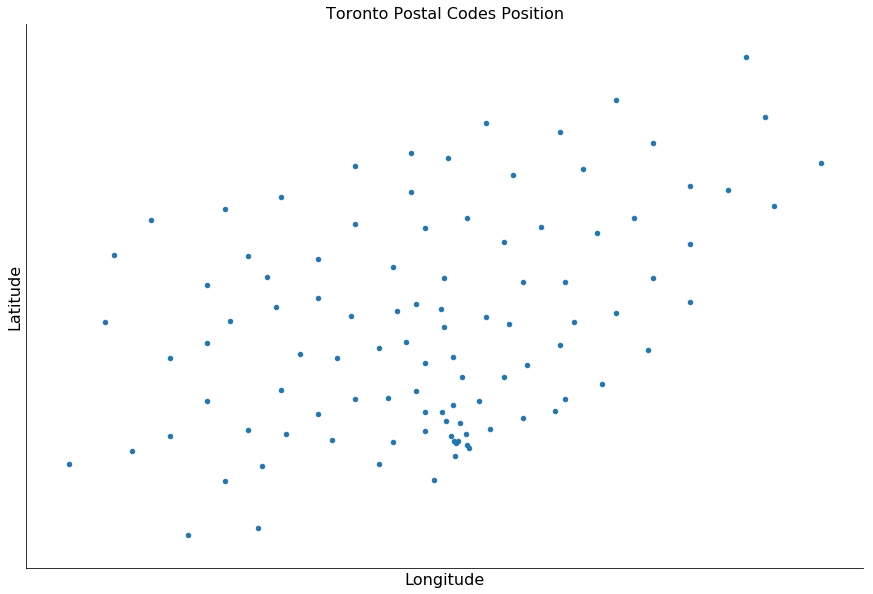

In [25]:

X = df1[['Longitude', 'Latitude']]

scatter_plot = X.plot.scatter(x='Longitude', 
               y='Latitude',  
               fontsize = 16,
               figsize=(15, 10))

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
scatter_plot.set_title('Toronto Postal Codes Position', fontsize=16)

scatter_plot.set_yticklabels(labels = 'Latitude', fontdict={'fontsize': 20})
plt.show()

In [26]:
# function to get the closest postcode pair and the distance using latitude and longitude
def closest_postcode(postcode, postcodes):
    postcode = np.asarray(postcode).reshape(1,-1)
    postcodes = np.asarray(postcodes)
    distances = [great_circle(postcode, point).meters for point in postcodes]
    closest_postcode_index = np.argmin(distances)
    return [round(distances[closest_postcode_index]), closest_postcode_index]

In [27]:
coordinates = df1[['Latitude', 'Longitude']]

distance, closest_point_index = closest_postcode(coordinates[:1], coordinates[~coordinates.index.isin([0])])
close_points = X[:1].append(X[closest_point_index+1:closest_point_index+2])
close_points

,Longitude,Latitude
Postcode,,
M1B,-79.194353,43.806686
M1C,-79.160497,43.784535


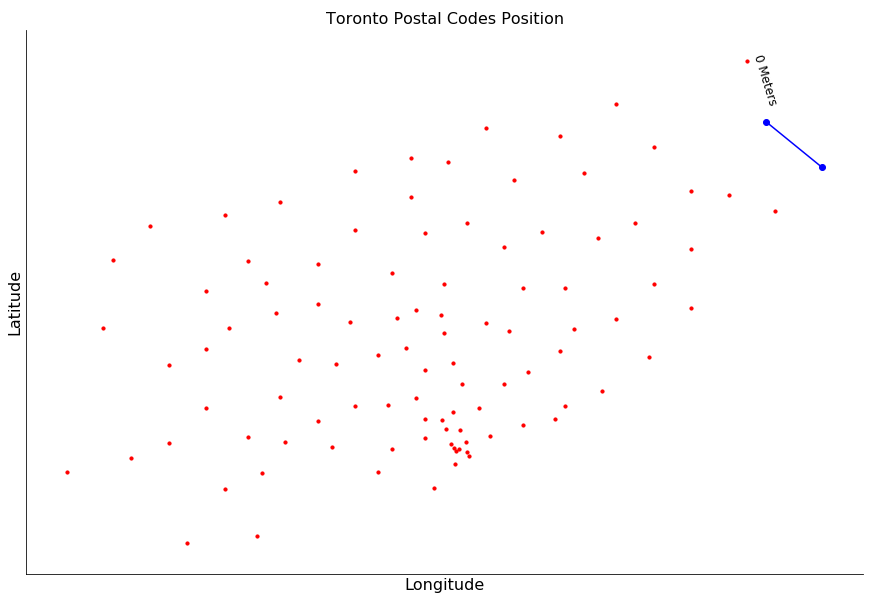

In [59]:

fig = plt.figure(figsize=(15,10))
scatter_plot = fig.add_subplot(111)
scatter_plot.scatter(X['Longitude'],X['Latitude'], s=10, c='r', marker="o")
scatter_plot.plot(close_points['Longitude'], close_points['Latitude'], c='b', marker="o")

# plt.legend(loc='upper left');
scatter_plot.annotate('{} Meters'.format(distance),
            xy=(.859, .912), xycoords='figure fraction',
            ha='left', va='top', rotation=-73,
            fontsize=12)

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)

plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Toronto Postal Codes Position', fontsize=16)

scatter_plot.set_yticklabels(labels = 'Latitude', fontdict={'fontsize': 20})
plt.show()

In [28]:
# Add Distance column to dataframe as the radius for each postcode

for lat, lng, idx in zip(df1['Latitude'], df1['Longitude'], df1.index):
    distance, closest_point_index = closest_postcode([lat,lng], coordinates[~coordinates.index.isin([idx])])
    df1.at[idx,'Distance'] = np.int64(distance//2) #use the half of the disstance to avoid overlapping
    
df1.head(15)

,Borough,Neighbourhood,Latitude,Longitude,Distance
Postcode,,,,,
M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353,1698.0
M1C,Scarborough,"Rouge Hill,Highland Creek,Port Union",43.784535,-79.160497,1625.0
M1E,Scarborough,"Morningside,Guildwood,West Hill",43.763573,-79.188711,1205.0
M1G,Scarborough,Woburn,43.770992,-79.216917,913.0
M1H,Scarborough,Cedarbrae,43.773136,-79.239476,913.0
M1J,Scarborough,Scarborough Village,43.744734,-79.239476,1301.0
M1K,Scarborough,"Kennedy Park,East Birchmount Park,Ionview",43.727929,-79.262029,1112.0
M1L,Scarborough,"Golden Mile,Clairlea,Oakridge",43.711112,-79.284577,1052.0
M1M,Scarborough,"Cliffside,Scarborough Village West,Cliffcrest",43.716316,-79.239476,1112.0


In [29]:
# generate updated map for Toronto using a different radius for each postcode, avoiding overlapping with wider coverage of the city

map = folium.Map(location=[43.6532,-79.3832], zoom_start=11)

for location in df1.itertuples(): #iterate each row of the dataframe
    label = 'Postal Code: {};  Borough: {};  Neighborhoods: {}'.format(location[1], location[2], location[3])
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [location[-3], location[-2]],
        radius=1,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map) 
    folium.Circle(
        radius=location[-1],
        popup=label,
        location=[location[-3], location[-2]],
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(map) 
    
map

In [30]:
# Foursquare credentials
CLIENT_ID = 'SABYLSS3JFYRH0ALWWP5AEHYPOZS35UHSFTGAIGMCQICK2AV'
CLIENT_SECRET = '4JBW3HEYA2AJDJPFX4YT1RTI5T1W0NAGVFL0QJEA10DW3TMI'
VERSION = '20181102'

In [31]:
# formats the url to return a max of 100 venues from the first postcode within a 500 meter radius

def format_url(lat, lng, radius=500, limit=100):
    return 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, 
        lat, lng, VERSION, radius, limit)

In [32]:
first_postcode = df1.iloc[2, :]
url = format_url(first_postcode['Latitude'], first_postcode['Longitude'], first_postcode['Distance'])

url

'https://api.foursquare.com/v2/venues/explore?client_id=SABYLSS3JFYRH0ALWWP5AEHYPOZS35UHSFTGAIGMCQICK2AV&client_secret=4JBW3HEYA2AJDJPFX4YT1RTI5T1W0NAGVFL0QJEA10DW3TMI&ll=43.7635726,-79.1887115&v=20181102&radius=1205.0&limit=100'

In [33]:
# gets batch of venues as a dataframe

def get_venues(url):
    results = requests.get(url).json()
    venues = results['response']['groups'][0]['items']
    return json_normalize(venues)

venues_df = get_venues(url)
venues_df.head()

,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,venue.location.distance,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bc366dab492d13a51b2a860-0,"[{'id': '4d4ae6fc7a7b7dea34424761', 'name': 'F...",4bc366dab492d13a51b2a860,4449 Kingston Road,CA,Scarborough,Canada,at Lawrence and Morningside,579,[4449 Kingston Road (at Lawrence and Morningsi...,"[{'label': 'display', 'lat': 43.76875171771289...",43.768752,-79.187982,M1E 2N7,ON,Chick-N-Joy,0,[]
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4ba164fdf964a52039b337e3-1,"[{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...",4ba164fdf964a52039b337e3,4525 Kingston Rd,CA,West Hill,Canada,Morningside Crossing,933,"[4525 Kingston Rd (Morningside Crossing), West...","[{'label': 'display', 'lat': 43.77134173380578...",43.771342,-79.184341,NaN,ON,Bulk Barn,0,[]
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b3a9504f964a520646a25e3-2,"[{'id': '4bf58dd8d48988d186941735', 'name': 'L...",4b3a9504f964a520646a25e3,4525 Kingston Rd.,CA,Toronto,Canada,at Lawrence Ave. E,944,"[4525 Kingston Rd. (at Lawrence Ave. E), Toron...","[{'label': 'display', 'lat': 43.77146181777272...",43.771462,-79.184384,M1E 2P1,ON,LCBO,0,[]
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4c9fdb04542b224bca4201a0-3,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",4c9fdb04542b224bca4201a0,4218 Lawrence Avenue East,CA,Scarborough,Canada,NaN,701,"[4218 Lawrence Avenue East, Scarborough ON M1E...","[{'label': 'display', 'lat': 43.76904597684398...",43.769046,-79.184386,M1E 4X9,ON,Little Caesars Pizza,0,[]
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4beca2f9d6e676b0538764d4-4,"[{'id': '4bf58dd8d48988d112941735', 'name': 'J...",4beca2f9d6e676b0538764d4,"4525 Kingston Road, Unit #H8",CA,Scarborough,Canada,at Collinsgrove Rd.,870,"[4525 Kingston Road, Unit #H8 (at Collinsgrove...","[{'label': 'display', 'lat': 43.77066813, 'lng...",43.770668,-79.184150,M1E 2P1,ON,Booster Juice,0,[]


In [34]:
# cleans the venues dataframe to only the relevant columns

def clean_df(df):
    relevant_columns = ['venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.name']
    clean_df = df.loc[:,relevant_columns]

    #rename columns
    clean_df.columns = ['Category', 'Lat', 'Lng', 'Name']
    return clean_df 

venues_df = clean_df(venues_df)
venues_df.head()

,Category,Lat,Lng,Name
0,"[{'id': '4d4ae6fc7a7b7dea34424761', 'name': 'F...",43.768752,-79.187982,Chick-N-Joy
1,"[{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...",43.771342,-79.184341,Bulk Barn
2,"[{'id': '4bf58dd8d48988d186941735', 'name': 'L...",43.771462,-79.184384,LCBO
3,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",43.769046,-79.184386,Little Caesars Pizza
4,"[{'id': '4bf58dd8d48988d112941735', 'name': 'J...",43.770668,-79.184150,Booster Juice


In [35]:
venues_df.loc[0, 'Category']


[{'id': '4d4ae6fc7a7b7dea34424761',
  'name': 'Fried Chicken Joint',
  'pluralName': 'Fried Chicken Joints',
  'shortName': 'Fried Chicken',
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/friedchicken_',
   'suffix': '.png'},
  'primary': True}]

In [36]:
#function that extract the category name
def get_category_name(row):
    category_json = row['Category']
    try:
        return category_json[0]['name']
    except:        
        return None

venues_df['Category'] = venues_df.apply(get_category_name, axis=1)

venues_df

,Category,Lat,Lng,Name
0,Fried Chicken Joint,43.768752,-79.187982,Chick-N-Joy
1,Food & Drink Shop,43.771342,-79.184341,Bulk Barn
2,Liquor Store,43.771462,-79.184384,LCBO
3,Pizza Place,43.769046,-79.184386,Little Caesars Pizza
4,Juice Bar,43.770668,-79.184150,Booster Juice
5,Breakfast Spot,43.772319,-79.184900,Sunset Grill
6,Restaurant,43.768122,-79.190493,Swiss Chalet
7,Coffee Shop,43.770370,-79.186490,Starbucks
8,Pharmacy,43.770282,-79.185012,Shoppers Drug Mart
9,Beer Store,43.769793,-79.187505,The Beer Store


In [42]:
#function to construct the dataframe with all the venues (max 100 venues per postal code)
def get_all_venues(postcodes, lat, lng, radius):
    venues_list=[]
    for postcode, lat, lng, radius in zip(postcodes, lat, lng, radius):
        url= format_url(lat, lng, radius)
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        venues_list.append([(
            postcode, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'], 
            v['venue']['categories'][0]['name'])
            for v in results])
    all_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    all_venues.columns = ['Postcode', 
                  'Postcode Latitude', 
                  'Postcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category'
                  ]
    
    return all_venues